In [1]:
# Compare two matchms tables

In [56]:
from prediction_utils import get_galaxy_filename
import numpy as np
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

In [57]:
from prediction_utils import get_galaxy_filename

fres1 = get_galaxy_filename('1_matchms output formatter', '../data', None)
fres2 = get_galaxy_filename('2_matchms output formatter', '../data', None)

fref = get_galaxy_filename('KC_Confirmed', '../data', None)


# reference_lib = "../data/1_rcx_gc-orbitrap_metabolites_20210817.msp.msp"
# concs = ["all"]
# # if the predictions were generated in this galaxy session set to True
# is_fresh = False
# suffix = "" if is_fresh else ".txt"


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
fres1

'../data/1_matchms output formatter _get-thresholded-data_ on data 122 and data 121.tsv'

In [59]:
ref = pd.read_csv(fref)
res1 = pd.read_csv(fres1, sep="\t", index_col=0)
res2 = pd.read_csv(fres2, sep="\t", index_col=0)


In [60]:
ground = set(ref["Metabolite name"])
# orig = set(res1.reference) 
# new = set(res2.reference) 

In [100]:
ground

{'2-Methylmalonic acid_2TMS',
 'Acetylgalactosamine_4TMS',
 'Acetylgalactosamine_5TMS isomer 1',
 'Acetylgalactosamine_5TMS isomer 2',
 'Acetylglucosamine_5TMS isomer 1',
 'Allose_5TMS isomer 1',
 'Allose_5TMS isomer 2',
 'Arabitol_5TMS',
 'Arginine_3TMS',
 'Asparagine_2TMS',
 'Asparagine_3TMS',
 'Asparagine_4TMS isomer 1',
 'Asparagine_4TMS isomer 2',
 'Aspartic acid_3TMS isomer',
 'Citric acid_4TMS',
 'Creatinine_3TMS',
 'D27-Myristic acid_TMS spectra 1',
 'D4-Succinic acid_2TMS spectra 1',
 'Fructose_5TMS isomer 1',
 'Fructose_5TMS isomer 2',
 'Fumaric acid_2TMS',
 'Glucose_5TMS isomer 1',
 'Glucuro-3,6-lactone_3TMS isomer 2',
 'Glutamic acid_3TMS spectra 2',
 'Glycine_3TMS',
 'Guanine_3TMS',
 'Histidine_3TMS',
 'Histidine_4TMS',
 'Hypoxanthine_2TMS',
 'Isoleucine_2TMS',
 'Itaconic acid_2TMS',
 'Leucine_2TMS',
 'Lysine_3TMS',
 'Lysine_4TMS',
 'Malic acid_3TMS',
 'Maltotriose_11TMS isomer 1',
 'Maltotriose_11TMS isomer 2',
 'Mannitol_6TMS',
 'Mannose_5TMS isomer 1',
 'Mannose_5TMS is

In [127]:
th_m = 5
th_s = 0.4

query
C02                  Lysine_4TMS
C06                Arabitol_5TMS
C06                Arabitol_5TMS
C06                Arabitol_5TMS
C06                Arabitol_5TMS
C06       Fructose_5TMS isomer 1
C06       Fructose_5TMS isomer 2
C06              Galactitol_6TMS
C06    Gluconic acid-1,4-lactone
C06                 Ribitol_5TMS
C06                  Ribose_4TMS
C06                  Xylose_4TMS
C08             Citric acid_4TMS
C10            Myo-inositol_6TMS
C16        Uridine_4TMS isomer 1
C17                  Serine_3TMS
C26     Threonine_3TMS spectra 1
Name: reference, dtype: object

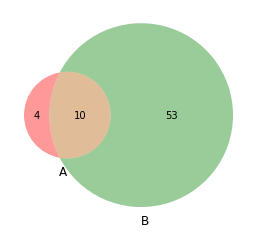

In [128]:
orig = res1[((res1.matches > th_m) & (res1.score > th_s))].reference
venn2((set(orig), ground))
orig

query
C01                  Lysine_4TMS
C04                Arabitol_5TMS
C04                Arabitol_5TMS
C04                Arabitol_5TMS
C04                Arabitol_5TMS
C04       Fructose_5TMS isomer 1
C04       Fructose_5TMS isomer 2
C04              Galactitol_6TMS
C04    Gluconic acid-1,4-lactone
C04                 Ribitol_5TMS
C04                  Ribose_4TMS
C04                  Xylose_4TMS
C10            Myo-inositol_6TMS
C18                  Serine_3TMS
C27     Threonine_3TMS spectra 1
Name: reference, dtype: object

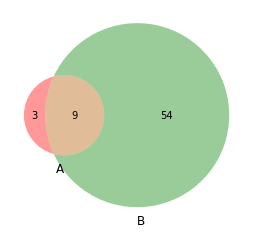

In [129]:
new = res2[((res2.matches > th_m) & (res2.score > th_s))].reference
venn2((set(new), ground))
new

In [122]:
orig = np.zeros(shape=(20, 10))
new = orig.copy()
for i, n_m in enumerate(range(1,21)):
    for j, n_s in enumerate(np.arange(0,1,0.1)):
        for res, grid in zip([res1, res2], [orig, new]):
            p = set(res[((res.matches > n_m) & (res.score > n_s))].reference)
            
            TP = len(p.intersection(ground))
            FP = len(p.difference(ground))
            FN = len(ground.difference(p))


            grid[i,j] = TP/(TP + 0.5*(FN+FP)) if (TP + 0.5*(FN+FP)) != 0 else 0
        

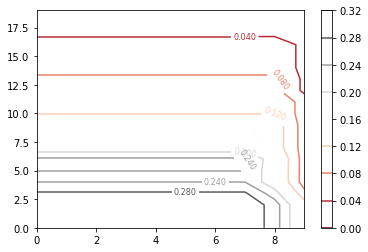

In [123]:
c = plt.contour(new, cmap='RdGy')
plt.clabel(c, inline=True, fontsize=8)

plt.colorbar()

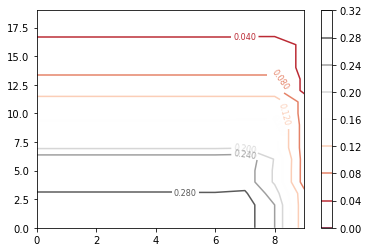

In [124]:
c = plt.contour(orig, cmap='RdGy')
plt.clabel(c, inline=True, fontsize=8)

plt.colorbar()


In [125]:
new.sum()

29.025459474944157

In [126]:
orig.sum()

30.068228621394375

In [131]:
th_m, th_s = 0, 0
orig = res1[((res1.matches > th_m) & (res1.score > th_s))].reference
new = res2[((res2.matches > th_m) & (res2.score > th_s))].reference


In [134]:
set(orig) -set(new)

{'Histidine_3TMS', 'Uridine_4TMS isomer 1'}

In [135]:
set(new) -set(orig)

{'Alanine_2TMS', 'Isoleucine_2TMS', 'Leucine_2TMS', 'Norleucine_2TMS'}

In [139]:
set(new) - ground

{'Alanine_2TMS',
 'Galactitol_6TMS',
 'Gluconic acid-1,4-lactone',
 'Norleucine_2TMS',
 'Norvaline_2TMS',
 'Pipecolinic acid_2TMS',
 'Xylose_4TMS'}

In [140]:
set(orig) - ground

{'Galactitol_6TMS',
 'Gluconic acid-1,4-lactone',
 'Norvaline_2TMS',
 'Pipecolinic acid_2TMS',
 'Uridine_4TMS isomer 1',
 'Xylose_4TMS'}